This sample was taken from: https://learning.edx.org/course/course-v1:MITx+18.032x+3T2021/block-v1:MITx+18.032x+3T2021+type@sequential+block@recitation17/block-v1:MITx+18.032x+3T2021+type@vertical+block@recitation17-tab1


Thanks yves-M for this awesome code sample

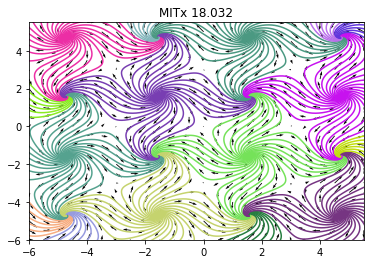

In [3]:


import numpy as np
import matplotlib.pyplot as plt


def get_neighbors(sources, r=0.01, nb=24):
    """
    takes a list of points (sources) and return a list of neighboring points
    :param sources: a list of pair of coordinates
    :param r: distance at which we want the neighbors to be
    :param nb: how many neighbors per source
    :return: list of coordinates of the neighboring points
    """
    points = []
    theta = 2*np.pi/nb
    for source in sources:
        for k in range(nb):
            points.append([source[0]+r*np.cos(k*theta), source[1]+r*np.sin(k*theta)])
    return points


def get_trajectory(starting_point, grad, end_test, dx=0.01, dy=0.01):
    """
    Calculates a trajectory by following the gradiant
    :param starting_point: 2,1 numpy array coordinates of the starting point
    :param grad: a function that returns the gradiant at a given point
    :param end_test: a function of the current trajectory that returns True when calculation must stop
    :param dx: incremental step
    :param dy: incremental step
    :return: two 1D arrays, the x and y coordinates of the points on the trajectory
    """
    traj_x = [starting_point[0]]  # the x coordinates of the points on the trajectory
    traj_y = [starting_point[1]]  # the y coordinates of the points on the trajectory
    nb = 0  # count the number of points in the ith trajectory
    while not end_test([traj_x, traj_y]):
        nabla = grad(traj_x[nb], traj_y[nb])
        traj_x.append(traj_x[nb] + nabla[0] * dx)
        traj_y.append(traj_y[nb] + nabla[1] * dy)
        nb += 1
    return traj_x, traj_y


def map_field(x, y, field, end_traj, sources, title='MITx 18.032', dx=0.01, dy=0.01):
    fig, ax = plt.subplots()
    # Plot the gradiant field
    x, y = np.meshgrid(x, y)
    u, v = field(x, y)
    ax_quiver = ax.quiver(x, y, u, v, units='width')
    for source in sources:            # pick a source point (in u3r5 it is a spiral critical point)
        starts = get_neighbors([source])
        col = (np.random.random(), np.random.random(), np.random.random())  # assign a random color to that source
        for i in range(len(starts)):                                        # pick a starting point near that source
            traj = get_trajectory(starts[i], grad=field, end_test=end_traj, dx=dx, dy=dy)
            ax.plot(traj[0], traj[1], '-', color=col)                       # plot the trajectory
    # set the limits of the plot to the limits of the data
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    ax.set_title(title)
    plt.show()


def u3r5():
    # I have decided to initiate trajectories out of the spiral sources
    # critical points associated to a spiral source are located at (pi/2 + pi*(k+m) , -pi/2 + pi*(k-m))
    sources = []
    for k in range(-3, 3):
        for m in range(-3, 3):
            sources.append([np.pi / 2 * (1 + 2 * (k + m)),
                            np.pi / 2 * (-1 + 2 * (k - m))])  # locations of spiral sources are 2-pi periodic
    # other criteria could be used to end the calculation of a trajectory
    max_length = 1000
    map_field(np.arange(-6, 6, 0.5), np.arange(-6, 6, 0.5), field=lambda x, y: (np.sin(x + y), np.sin(x - y)),
              end_traj=lambda trajectory: len(trajectory[0]) > max_length, sources=sources)


u3r5()



